### LIBRARIES

In [1]:
import itertools
import random
import shutil
import pandas as pd
import numpy as np
from pathlib import Path
from pprint import pprint

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import make_scorer, log_loss
from sklearn.model_selection import StratifiedKFold, cross_val_score

from tqdm import tqdm
import msgc

In [2]:
from tsfresh import extract_features

In [3]:
RANDOM_SEED = 42
tqdm.pandas()

### DATA

In [4]:
metadata = pd.read_csv("data/metadata.csv", index_col="sample_id")
train_files = metadata[metadata["split"] == "train"]["features_path"].to_dict()
val_files = metadata[metadata["split"] == "val"]["features_path"].to_dict()
test_files = metadata[metadata["split"] == "test"]["features_path"].to_dict()

In [5]:
train_labels = pd.read_csv("data/train_labels.csv", index_col="sample_id")
target_cols = train_labels.columns
train_labels.columns

Index(['aromatic', 'hydrocarbon', 'carboxylic_acid',
       'nitrogen_bearing_compound', 'chlorine_bearing_compound',
       'sulfur_bearing_compound', 'alcohol', 'other_oxygen_bearing_compound',
       'mineral'],
      dtype='object')

### SPECTOGRAMS

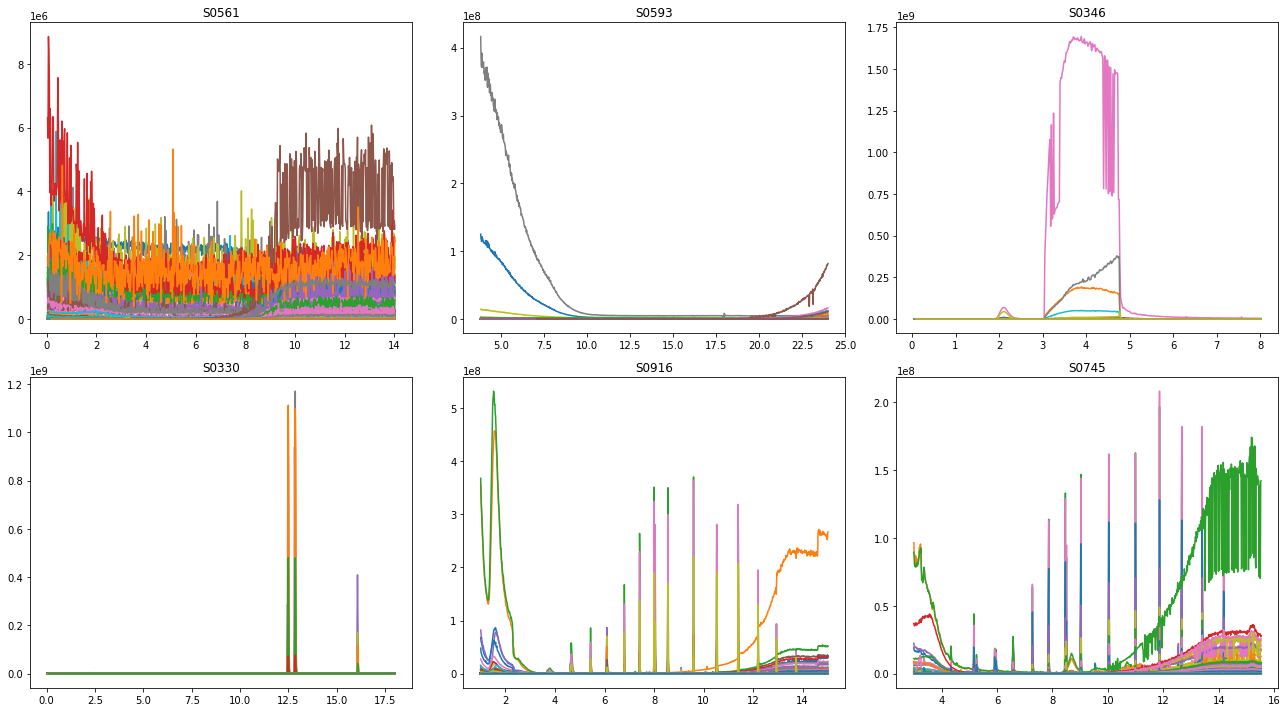

In [6]:
msgc.viz.grid_plot(metadata, msgc.viz.plot_spectrogram, random.sample(list(metadata.index), 6), cols=3)

<AxesSubplot:xlabel='time'>

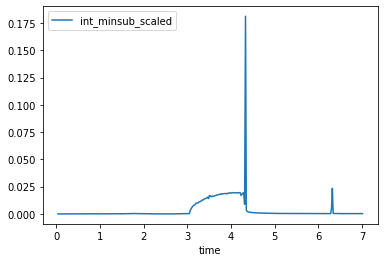

In [7]:
df = msgc.features.preprocess_sample(pd.read_csv('data/train_features/S0000.csv'), mass_cutoff=650)
df_35 = df[df['rounded_mass']==45]
df_35.plot(x='time', y='int_minsub_scaled')

In [8]:
df['rounded_mass'].nunique()

532

In [9]:
df_35['id'] = 1

C:\Users\moses\AppData\Local\Temp\ipykernel_3288\1649504784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_35['id'] = 1


In [10]:
extracted_features = extract_features(df_35[['id', 'time', 'int_minsub_scaled']], column_id="id", column_sort="time")

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:07<00:00,  7.11s/it]


In [11]:
# extracted_features.columns = [col.split('__')[1] for col in extracted_features.columns]

In [12]:
peak_columns = [col for col in extracted_features.columns if 'peak' in col]

In [13]:
extracted_features[peak_columns]

,int_minsub_scaled__number_cwt_peaks__n_1,int_minsub_scaled__number_cwt_peaks__n_5,int_minsub_scaled__number_peaks__n_1,int_minsub_scaled__number_peaks__n_3,int_minsub_scaled__number_peaks__n_5,int_minsub_scaled__number_peaks__n_10,int_minsub_scaled__number_peaks__n_50
1,32.0,29.0,79.0,33.0,14.0,5.0,2.0
